In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from subprocess import check_output
print(check_output(["ls", "../input/diamonds-csv-updated"]).decode("utf8"))


diamonds.csv



In [2]:
data = pd.read_csv('../input/diamonds-csv-updated/diamonds.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   depth      53940 non-null  float64
 5   table      53940 non-null  float64
 6   price      53940 non-null  int64  
 7   x          53940 non-null  float64
 8   y          53940 non-null  float64
 9   z          53940 non-null  float64
 10  log_price  53940 non-null  float64
 11  volume     53940 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 4.9+ MB


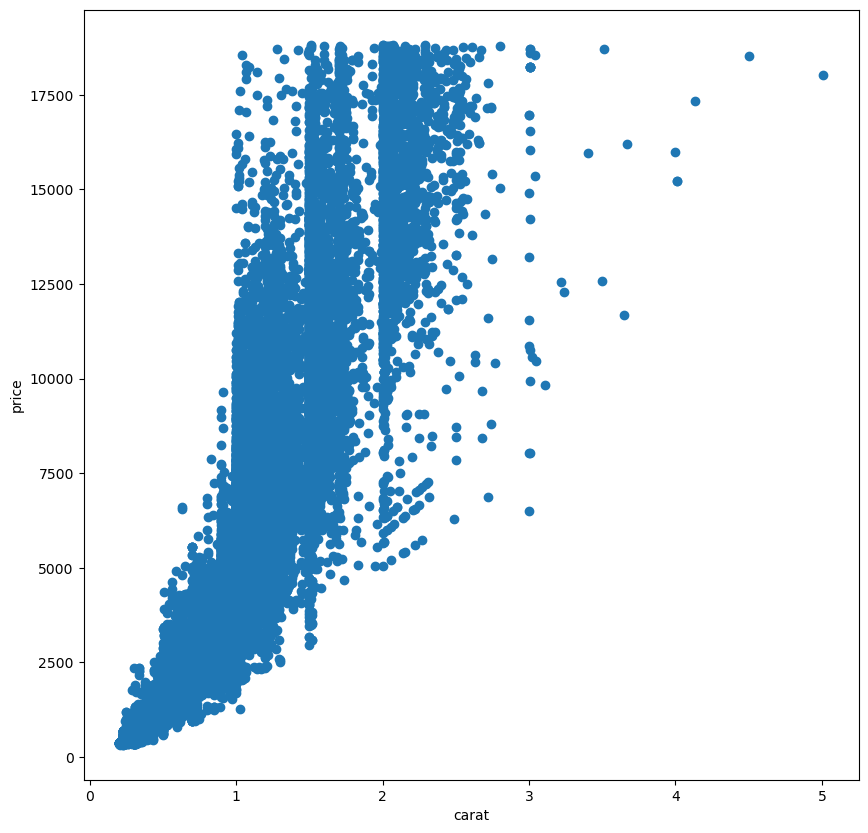

In [4]:
x = np.array(data.loc[:,'carat']).reshape(-1,1)
y = np.array(data.loc[:,'price']).reshape(-1,1)

plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


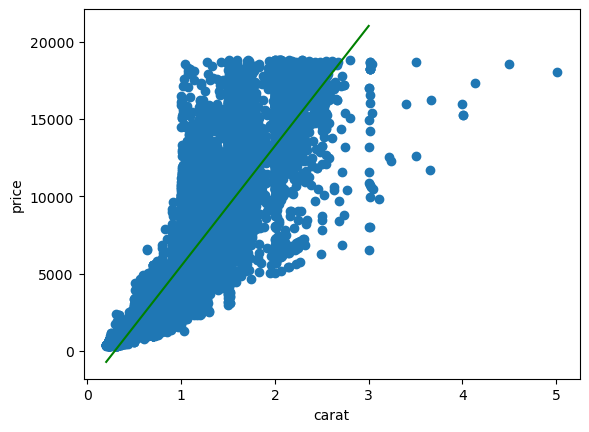

In [6]:
#linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(x,y)

# Predict space
predict_space = np.linspace(min(x), 3).reshape(-1,1) 
# Predict
lin_y = lin_reg.predict(predict_space)

plt.plot(predict_space, lin_y, color='green')
plt.scatter(x=x,y=y)
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

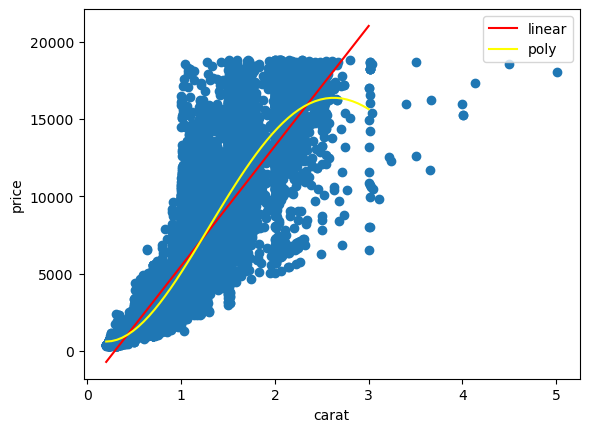

In [8]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_regression = PolynomialFeatures(degree = 5)
x_poly = poly_regression.fit_transform(x)
pred_x_poly = poly_regression.fit_transform(predict_space)
poly_reg = LinearRegression()
poly_reg.fit(x_poly,y)

poly_y = poly_reg.predict(pred_x_poly)

plt.scatter(x,y)
plt.xlabel("carat")
plt.ylabel("price")
plt.plot(predict_space, lin_y, color='red', label = "linear")
plt.plot(predict_space, poly_y, color= "yellow", label = "poly")
plt.legend()
plt.show()

In [9]:
pred_y1 = lin_reg.predict(x)
pred_y2 = poly_reg.predict(x_poly)

In [10]:
from sklearn.metrics import r2_score

print("r_square score for linear regression: ", r2_score(y,pred_y1))

print("r_square score for polynomial regression: ", r2_score(y,pred_y2))

r_square score for linear regression:  0.8493305264354858
r_square score for polynomial regression:  0.869981685269485


In [11]:
#Multiple Linear Regression
x2 = data.loc[:,["carat","depth"]].values

multi_lin_reg = LinearRegression()
multi_lin_reg.fit(x2,y)

print("b0:", multi_lin_reg.intercept_)
print("b1, b2: ",multi_lin_reg.coef_)

b0: [4045.3331826]
b1, b2:  [[7765.14066377 -102.16532216]]


In [13]:
print(lin_reg.predict([[3]]))
print(multi_lin_reg.predict(np.array([3,62]).reshape(1,-1)))
print(poly_reg.predict(poly_regression.fit_transform([[3]])))

[[21012.91627386]]
[[21006.50520011]]
[[15632.22645059]]
